In [1]:
import pandas as pd

df = pd.read_csv("/Users/ian/Desktop/Study/data/school/data.csv")
df.head()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score,Label
0,12.4,95.6,10.6,13.3,33.3,5226,14.1,0.82,59.8,0
1,29.9,90.1,20.1,65.3,33.9,2473,15.6,0.63,59.8,0
2,24.7,82.6,18.9,43.5,28.4,2473,15.6,0.63,59.8,0
3,61.3,98.6,67.5,94.6,65.4,9666,10.5,0.54,76.1,1
4,62.4,98.8,57.0,95.0,49.8,9666,10.5,0.54,73.0,1


In [2]:
train_cols = df.columns[:-2]
X = df[train_cols]
y = df["Label"]
df["Label"].value_counts()

0    2158
1     445
Name: Label, dtype: int64

In [3]:
# 언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=["Label"])
df_samp = pd.concat([X_samp,y_samp],axis=1)
df_samp["Label"].value_counts()

0    445
1    445
Name: Label, dtype: int64

In [4]:
X = df_samp[train_cols]
y = df_samp["Label"]

In [5]:
# 학습용/검증용 데이터셋 나누기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [6]:
# 로지스틱 회귀분석

from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(random_state=10, max_iter=1000)
logit.fit(X_train,y_train)

print(logit.score(X_train, y_train))
print(logit.score(X_test, y_test))

0.8862359550561798
0.8595505617977528


In [7]:
# 스케일링

from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

In [8]:
# 전체 결과를 쌓을 리스트 생성

result_tr = []
result_te = []

In [9]:
logit = LogisticRegression(random_state=0, max_iter=1000)
logit.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [10]:
score_tr = logit.score(X_train_scaled, y_train)
score_te = logit.score(X_test_scaled, y_test)
print(score_tr)
print(score_te)
result_tr.append(score_tr)
result_te.append(score_te)

0.9887640449438202
0.9943820224719101


In [11]:
# 의사결정나무

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=10)
tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=10)

In [12]:
print(tree.score(X_train_scaled, y_train))
print(tree.score(X_test_scaled, y_test))

1.0
0.9719101123595506


In [13]:
tree = DecisionTreeClassifier(max_depth=4, random_state=10)
tree.fit(X_train_scaled, y_train)

score_tr = tree.score(X_train_scaled, y_train)
score_te = tree.score(X_test_scaled, y_test)
print(score_tr)
print(score_te)
result_tr.append(score_tr)
result_te.append(score_te)

0.9789325842696629
0.9775280898876404


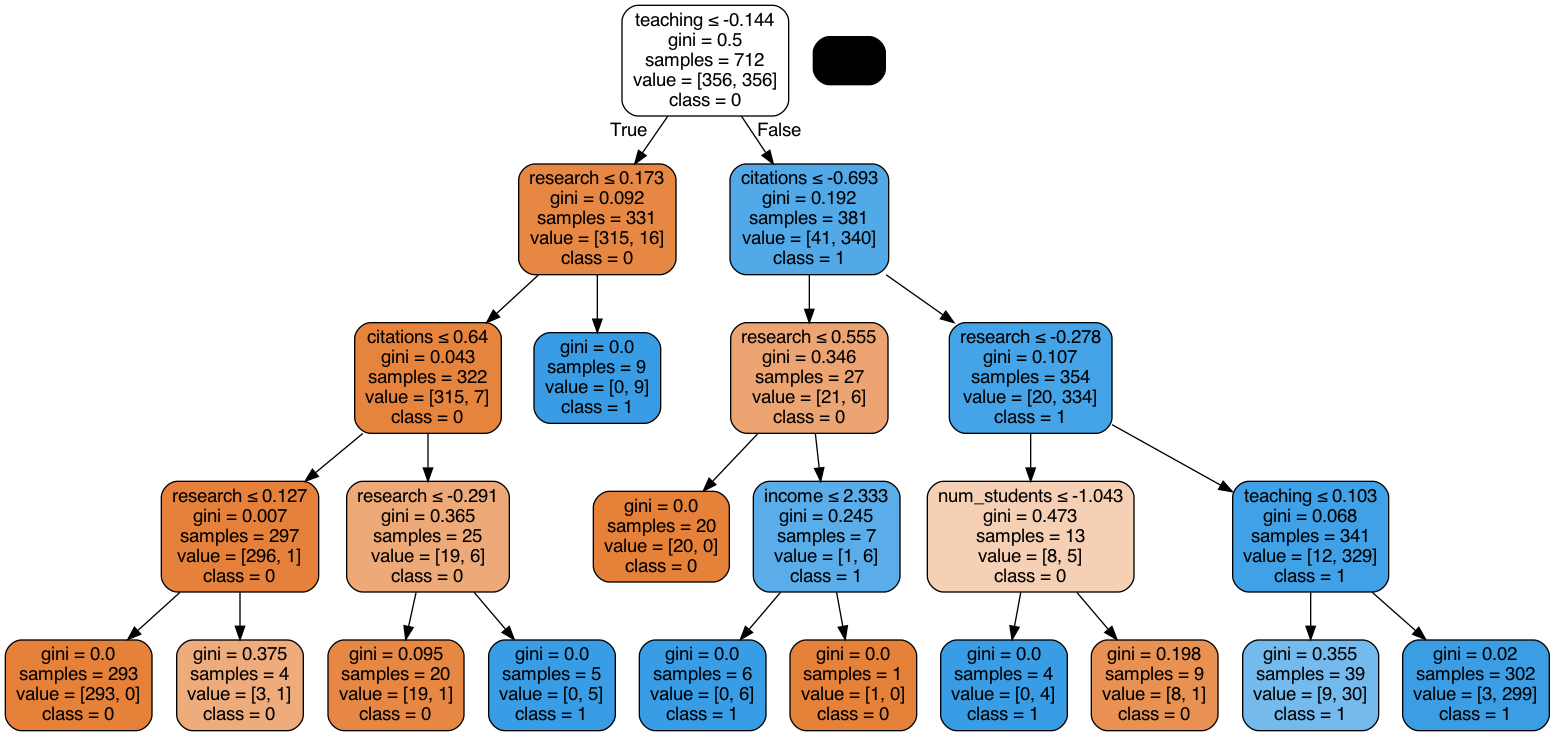

In [14]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

dot_data = export_graphviz(tree, out_file=None, feature_names=train_cols, class_names=['0','1'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def plot_tree(model):
    n_features = X.shape[1]
    plt.rcParams["figure.figsize"]=(16,9)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),train_cols)
    plt.ylim(-1,n_features)

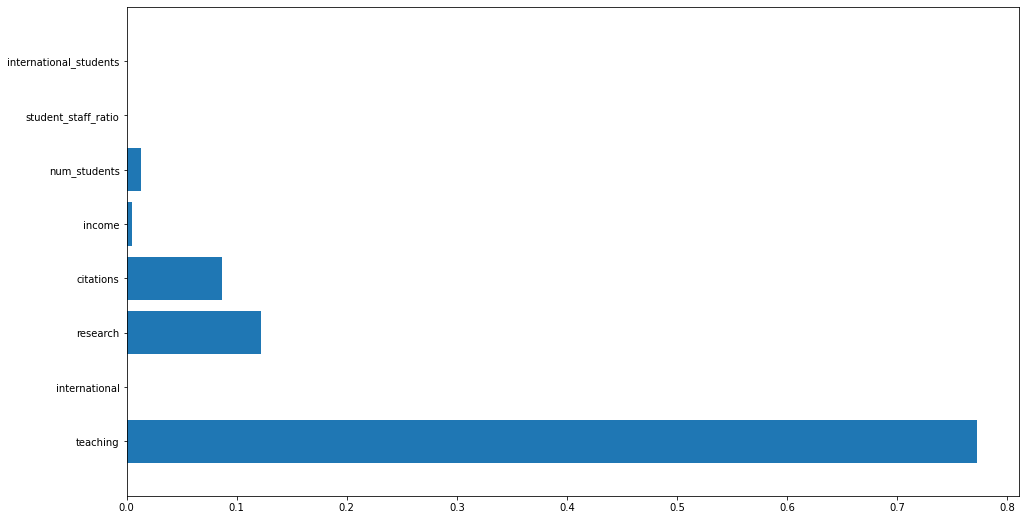

In [16]:
plot_tree(tree)

In [17]:
# 랜덤포레스트

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=10)
forest.fit(X_train_scaled, y_train)

score_tr = forest.score(X_train_scaled, y_train)
score_te = forest.score(X_test_scaled, y_test)
print(score_tr)
print(score_te)

1.0
0.9943820224719101


In [18]:
result_tr.append(score_tr)
result_te.append(score_te)

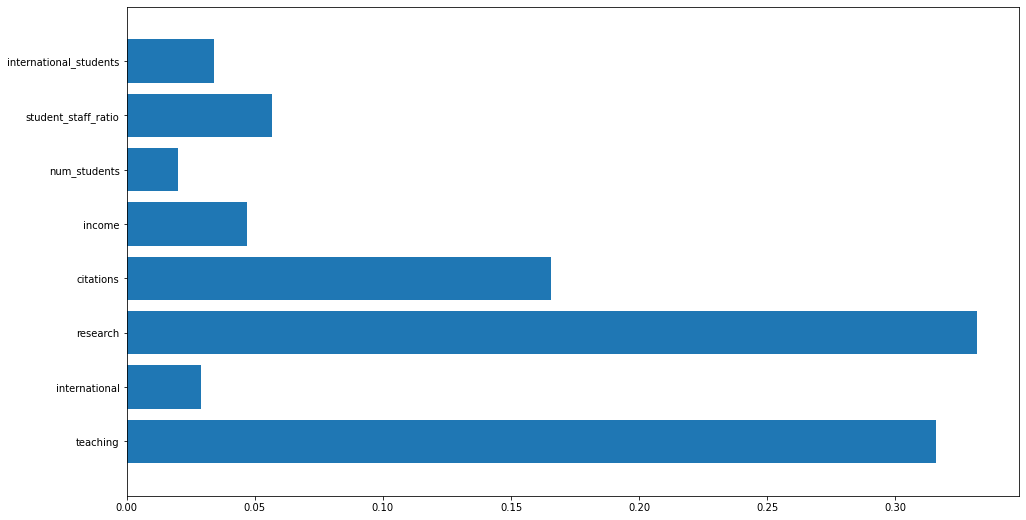

In [21]:
plot_tree(forest)

In [22]:
# KNN
# 이번에는 코드로 하고 다음에는 GridSearch로 함

from sklearn.neighbors import KNeighborsClassifier
import numpy as np

train_rate = []
test_rate = []

neighbors = range(1,11)
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    train_rate.append(knn.score(X_train_scaled, y_train))
    test_rate.append(knn.score(X_test_scaled, y_test))

test_arr = np.array(test_rate)
max_rate = np.max(test_arr)
idx = np.where(test_arr == max_rate)[0][0] # 최대값의 인덱스
print(neighbors[idx])
print(test_rate[idx])

5
0.9887640449438202


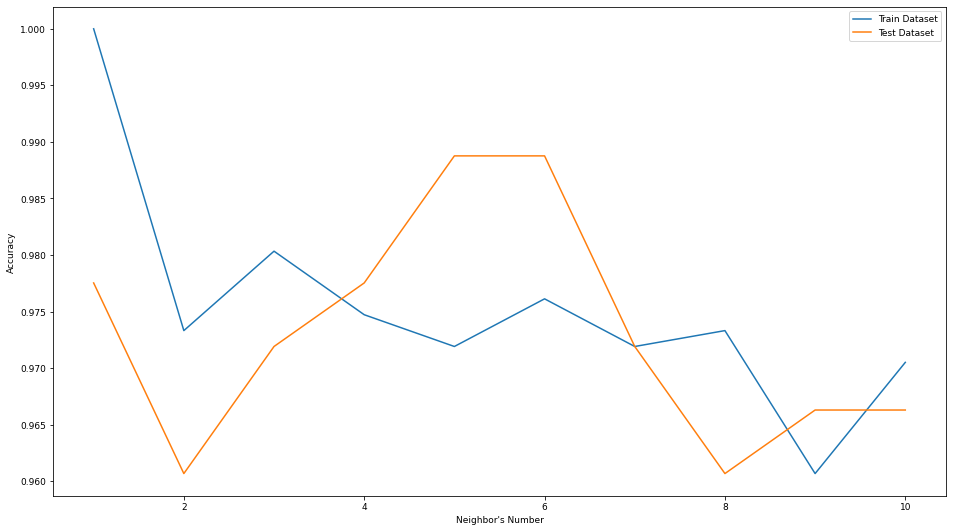

In [23]:
import matplotlib.pyplot as plt

plt.rcParams["font.size"]=9
plt.plot(neighbors, train_rate, label="Train Dataset")
plt.plot(neighbors, test_rate, label="Test Dataset")
plt.ylabel("Accuracy")
plt.xlabel("Neighbor's Number")
plt.legend()
plt.show()

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

score_tr = knn.score(X_train_scaled, y_train)
score_te = knn.score(X_test_scaled, y_test)
print(score_tr)
print(score_te)

0.9719101123595506
0.9887640449438202


In [25]:
result_tr.append(score_tr)
result_te.append(score_te)

In [29]:
# 신경망모델

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=10, max_iter=1000)
mlp.fit(X_train_scaled, y_train)
print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))

0.9943820224719101
1.0


In [30]:
mlp = MLPClassifier(max_iter=1000, hidden_layer_sizes=[100,100], random_state=10)
mlp.fit(X_train_scaled, y_train)

score_tr = mlp.score(X_train_scaled, y_train)
score_te = mlp.score(X_test_scaled, y_test)
print(score_tr)
print(score_te)

1.0
1.0


In [31]:
result_tr.append(score_tr)
result_te.append(score_te)

In [35]:
# svm

from sklearn.svm import SVC

svm = SVC(random_state=10)
svm.fit(X_train_scaled, y_train)
print(svm.score(X_train_scaled, y_train))
print(svm.score(X_test_scaled, y_test))

0.9873595505617978
0.9887640449438202


In [36]:
import numpy as np

train_rate = []
test_rate = []

c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
g_values = [0.0001, 0.001, 0.01, 0.1]

for n in c_values:
    for g in g_values:
        svm = SVC(C=n, gamma=g, random_state=10)
        svm.fit(X_train_scaled, y_train)
        train_rate.append([n,g,svm.score(X_train_scaled,y_train)])
        test_rate.append([n,g,svm.score(X_test_scaled,y_test)])

train_arr = np.array(train_rate)
test_arr = np.array(test_rate)
max_rate = np.max(test_arr[:,2])
idx = np.argmax(test_arr[:,2])

print(test_rate[idx][0])
print(test_rate[idx][1])
print(test_rate[idx][2])

100
0.01
1.0


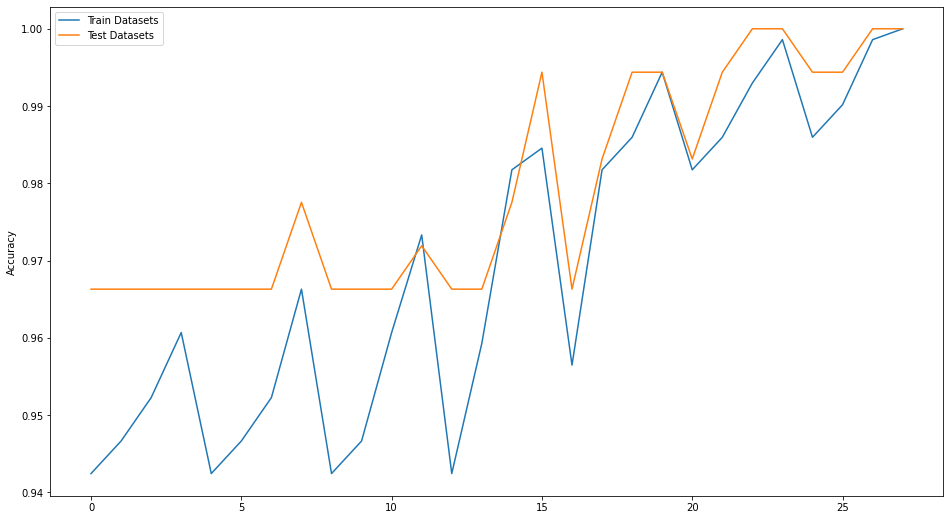

In [37]:
plt.rcParams["font.size"]=10
plt.plot(range(len(train_rate)), train_arr[:,2], label="Train Datasets")
plt.plot(range(len(test_rate)), test_arr[:,2], label="Test Datasets")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [38]:
from sklearn.svm import SVC

svm = SVC(C=100, gamma=0.01, random_state=10)
svm.fit(X_train_scaled,y_train)

score_tr = svm.score(X_train_scaled, y_train)
score_te = svm.score(X_test_scaled, y_test)
print(score_tr)
print(score_te)

0.9929775280898876
1.0


In [39]:
result_tr.append(score_tr)
result_te.append(score_te)

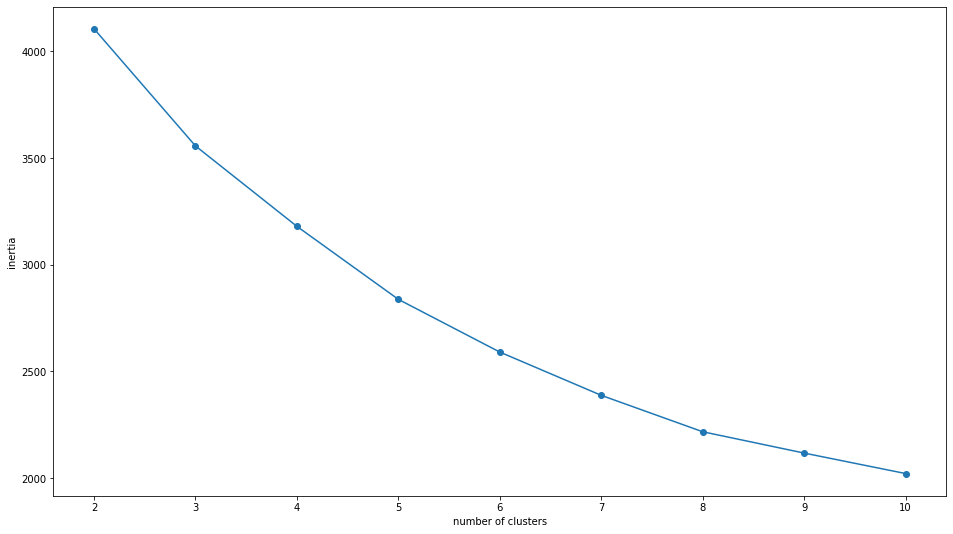

In [40]:
# 군집화 / 클러스터링

from sklearn.cluster import KMeans

clusters = range(2,11)
inertias = []

for n in clusters:
    km = KMeans(n_clusters=n, random_state=10)
    km.fit(X_train_scaled)
    inertias.append(km.inertia_)

plt.rcParams["font.size"]=10
plt.plot(clusters, inertias, "-o")
plt.ylabel("inertia")
plt.xlabel("number of clusters")
plt.show()

In [41]:
km = KMeans(n_clusters=5, random_state=10)
km.fit(X_train_scaled)
pred_tr = km.predict(X_train_scaled)
pred_te = km.predict(X_test_scaled)

In [42]:
from sklearn.metrics import silhouette_score

score_tr = silhouette_score(X_train_scaled, pred_tr)
score_te = silhouette_score(X_test_scaled, pred_te)
print(score_tr)
print(score_te)

0.20410528831789523
0.20148731094280548


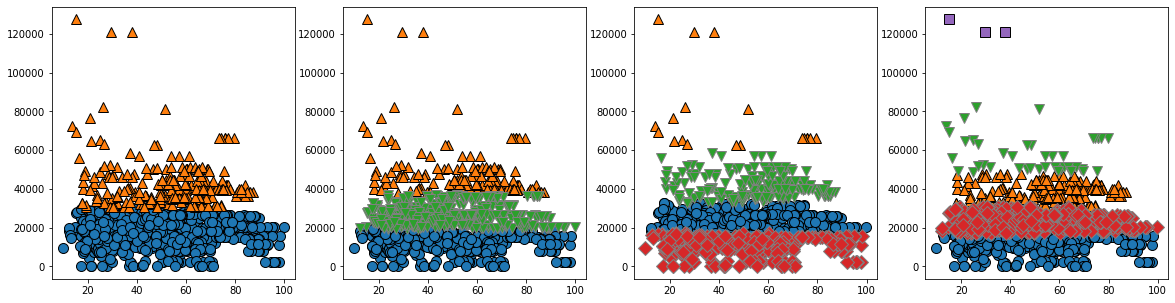

In [43]:
from matplotlib import pyplot as plt
import mglearn

fig, axes = plt.subplots(1, 4, figsize=(20,5))

idx = 0
for k in [2,3,4,5]:
    km = KMeans(n_clusters=k)
    km.fit(X)
    lbls = km.labels_

    mglearn.discrete_scatter(X["teaching"], X["num_students"], lbls, ax=axes[idx])
    idx+=1

In [46]:
# 알고리즘별 예측도 그래프

methods = ["LOGIT", "Tree", "RF", "KNN", "ANN", "SVM"]

result_tr_arr = np.array(result_tr)
max_rate_tr = np.max(result_tr_arr)
idx_tr = np.argmax(result_tr_arr)

result_te_arr = np.array(result_te)
max_rate_te = np.max(result_te_arr)
idx_te = np.argmax(result_te_arr)

print(methods)
print(result_tr)
print(result_te)
print("===================================================")
print(methods[idx_tr])
print(max_rate_tr)
print(methods[idx_te])
print(max_rate_te)

['LOGIT', 'Tree', 'RF', 'KNN', 'ANN', 'SVM']
[0.9887640449438202, 0.9789325842696629, 1.0, 0.9719101123595506, 1.0, 0.9929775280898876]
[0.9943820224719101, 0.9775280898876404, 0.9943820224719101, 0.9887640449438202, 1.0, 1.0]
RF
1.0
ANN
1.0


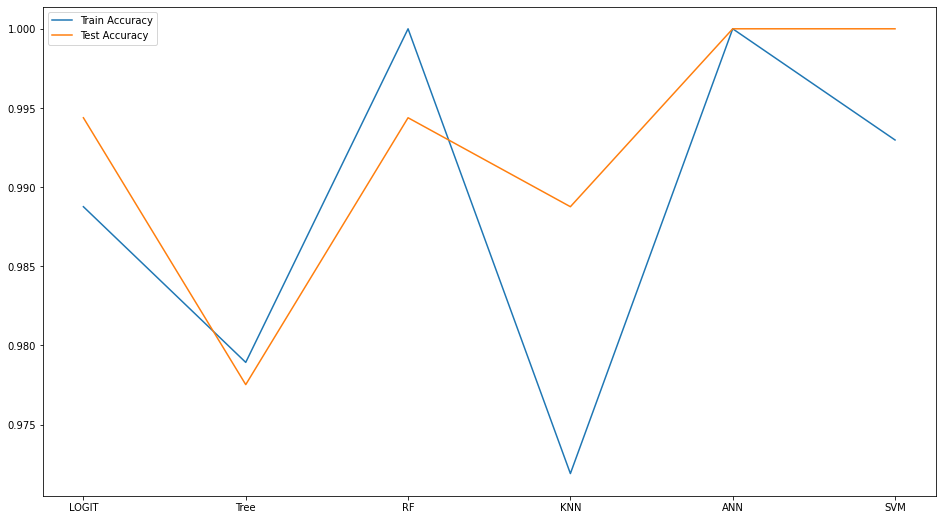

In [47]:
plt.rcParams["font.size"]=10
plt.plot(methods, result_tr_arr, label="Train Accuracy")
plt.plot(methods, result_te_arr, label="Test Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV
# 처음부터 다시 해보자

In [48]:
import pandas as pd

df = pd.read_csv("/Users/ian/Desktop/Study/data/school/data.csv")
train_cols = df.columns[:-2]
X = df[train_cols]
y = df["Label"]

In [49]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=["Label"])
df_samp = pd.concat([X_samp,y_samp],axis=1)
df_samp["Label"].value_counts()

0    445
1    445
Name: Label, dtype: int64

In [50]:
X = df_samp[train_cols]
y = df_samp["Label"]

# 교차검증이라서 학습용 검증용으로 나눌 필요 없음

In [51]:
import statsmodels.api as sm

model = sm.Logit(y,X)
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.263067
         Iterations 8
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.620      
Dependent Variable:   Label             AIC:               484.2592   
Date:                 2021-12-16 11:53  BIC:               522.5889   
No. Observations:     890               Log-Likelihood:    -234.13    
Df Model:             7                 LL-Null:           -616.90    
Df Residuals:         882               LLR p-value:       5.0478e-161
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       8.0000                                          
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
teaching               -0.0665   0.0155 -4.2972 0.0000 -0.0969 -0.0362
int

In [53]:
# 논문인용수citations 제외

cols = ['teaching', 'international', 'research', 'income',
       'num_students', 'student_staff_ratio', 'international_students']
X = df_samp[cols]
model = sm.Logit(y,X)
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.263068
         Iterations 8
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.620      
Dependent Variable:   Label             AIC:               482.2606   
Date:                 2021-12-16 11:55  BIC:               515.7991   
No. Observations:     890               Log-Likelihood:    -234.13    
Df Model:             6                 LL-Null:           -616.90    
Df Residuals:         883               LLR p-value:       4.2846e-162
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       8.0000                                          
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
teaching               -0.0668   0.0139 -4.8183 0.0000 -0.0940 -0.0396
int

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('sclaer', StandardScaler()),
    ('clf', LogisticRegression(random_state=0)),
])
params = {
    'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100]
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__C': 100}
0.9156770406770406


In [55]:
scores = []

In [56]:
scores.append(grid.best_score_)
scores

[0.9156770406770406]

In [58]:
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([
    ('sclaer', StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=0)),
])
params = {
    'clf__max_depth': list(range(3,6)) # 가지치기 수 3~5일 때 최선은?
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 3}
0.7817135317135318


In [59]:
scores.append(grid.best_score_)
scores

[0.9156770406770406, 0.7817135317135318]

In [60]:
tree = grid.best_estimator_['clf']

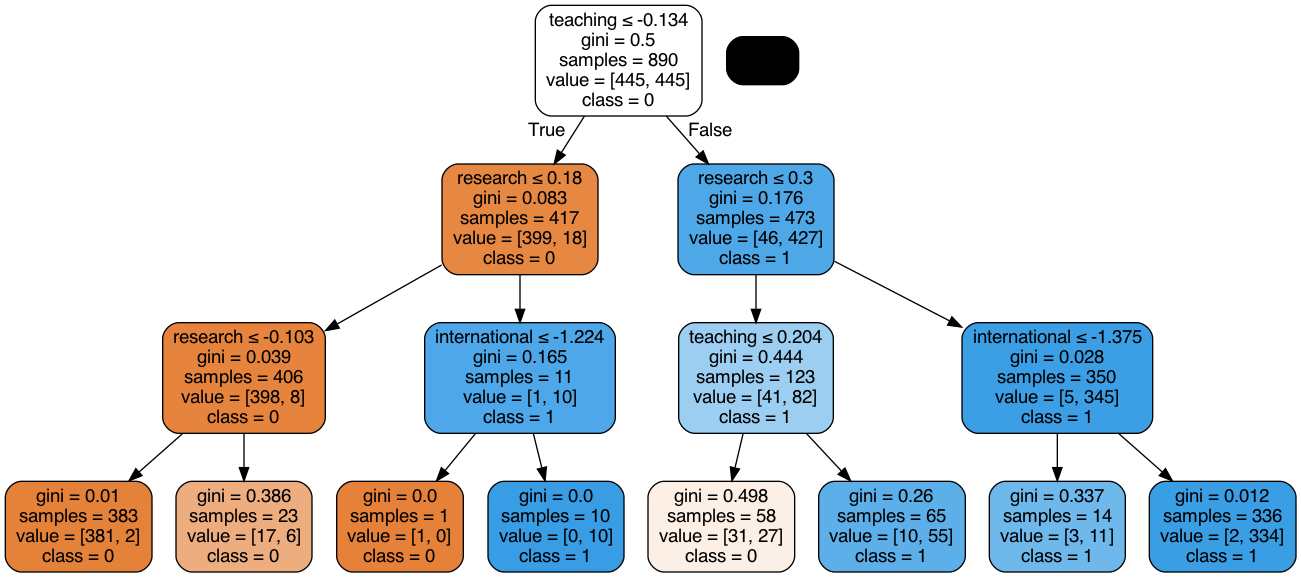

In [61]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

dot_data = export_graphviz(tree, out_file=None, feature_names=cols, class_names=['0','1'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def plot_tree(model):
    n_features = X.shape[1]
    plt.rcParams["figure.figsize"]=(16,9)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),cols)
    plt.ylim(-1,n_features)

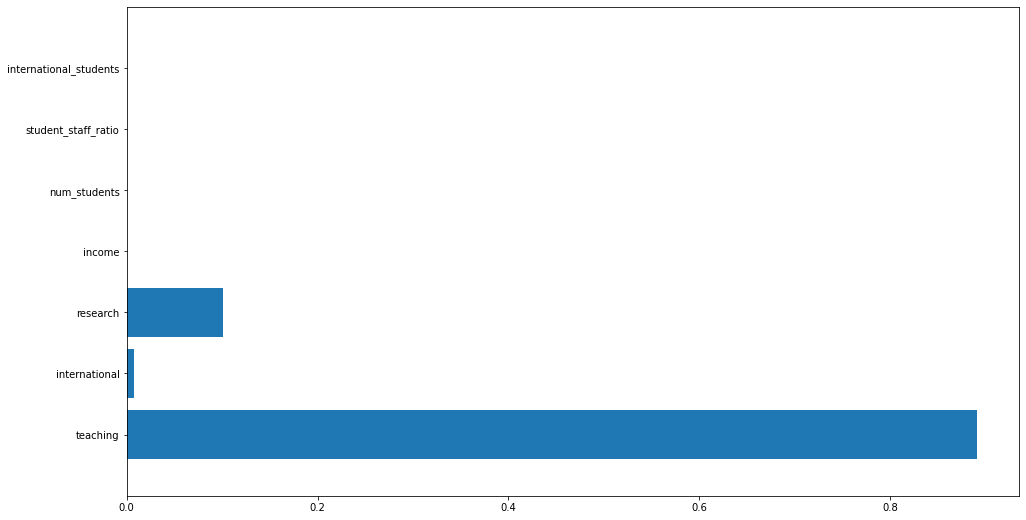

In [63]:
plot_tree(tree)

In [64]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ('sclaer', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=0)),
])
params = {
    'clf__max_depth': list(range(3,6)),
    'clf__n_estimators': list(range(10,110,10))
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 4, 'clf__n_estimators': 20}
0.7918259168259167


In [65]:
scores.append(grid.best_score_)
scores

[0.9156770406770406, 0.7817135317135318, 0.7918259168259167]

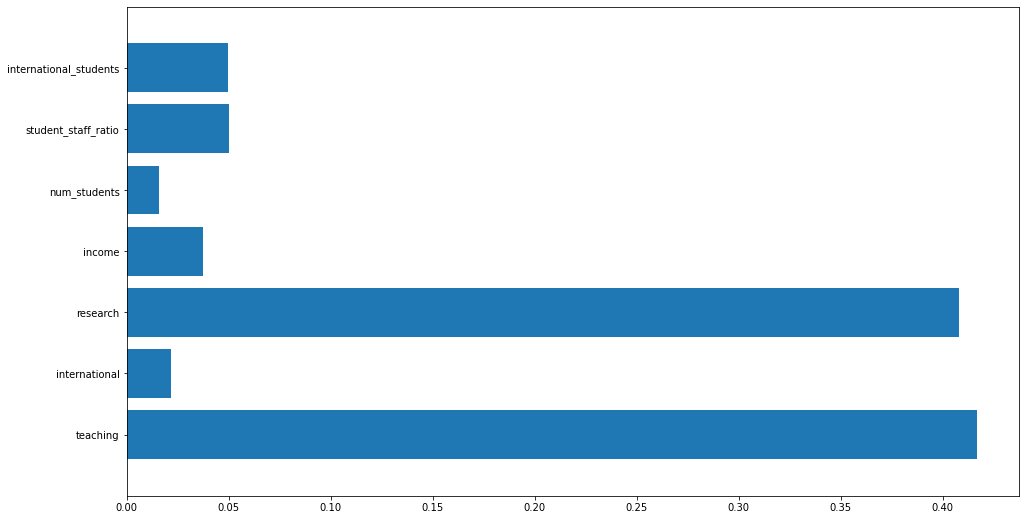

In [66]:
rf = grid.best_estimator_['clf']
plot_tree(rf)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([
    ('sclaer', StandardScaler()),
    ('clf', KNeighborsClassifier()),
])
params = {
    'clf__n_neighbors': list(range(1,11)) # 이웃 1~10 중에 몇 개 고려해야 최선?
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__n_neighbors': 9}
0.8280401613734947


In [68]:
scores.append(grid.best_score_)
scores

[0.9156770406770406,
 0.7817135317135318,
 0.7918259168259167,
 0.8280401613734947]

In [69]:
from sklearn.neural_network import MLPClassifier

pipe = Pipeline([
    ('sclaer', StandardScaler()),
    ('clf', MLPClassifier(random_state=0, max_iter=1000)),
])
params = {
    'clf__hidden_layer_sizes': [(50,),(100,),(50,50),(100,100)],
    'clf__activation': ['tanh','relu'], # 활성화 함수는 뭐가 최선?
    'clf__alpha': [0.001, 0.01, 0.1]
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__activation': 'tanh', 'clf__alpha': 0.1, 'clf__hidden_layer_sizes': (100,)}
0.9100539933873266


In [70]:
scores.append(grid.best_score_)
scores

[0.9156770406770406,
 0.7817135317135318,
 0.7918259168259167,
 0.8280401613734947,
 0.9100539933873266]

In [71]:
from sklearn.svm import SVC

pipe = Pipeline([
    ('sclaer', StandardScaler()),
    ('clf', SVC(random_state=0)),
])
params = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'clf__gamma': [0.0001, 0.001, 0.01, 0.1]
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__C': 1000, 'clf__gamma': 0.0001}
0.9111725361725362


In [72]:
scores.append(grid.best_score_)
scores

[0.9156770406770406,
 0.7817135317135318,
 0.7918259168259167,
 0.8280401613734947,
 0.9100539933873266,
 0.9111725361725362]

In [73]:
methods = ["LOGIT", "Tree", "RF", "KNN", "ANN", "SVM"]

scores_arr = np.array(scores)
max_rate = np.max(scores_arr)
idx = np.argmax(scores_arr)

print(methods)
print(scores_arr)
print(methods[idx])
print(max_rate)

['LOGIT', 'Tree', 'RF', 'KNN', 'ANN', 'SVM']
[0.91567704 0.78171353 0.79182592 0.82804016 0.91005399 0.91117254]
LOGIT
0.9156770406770406


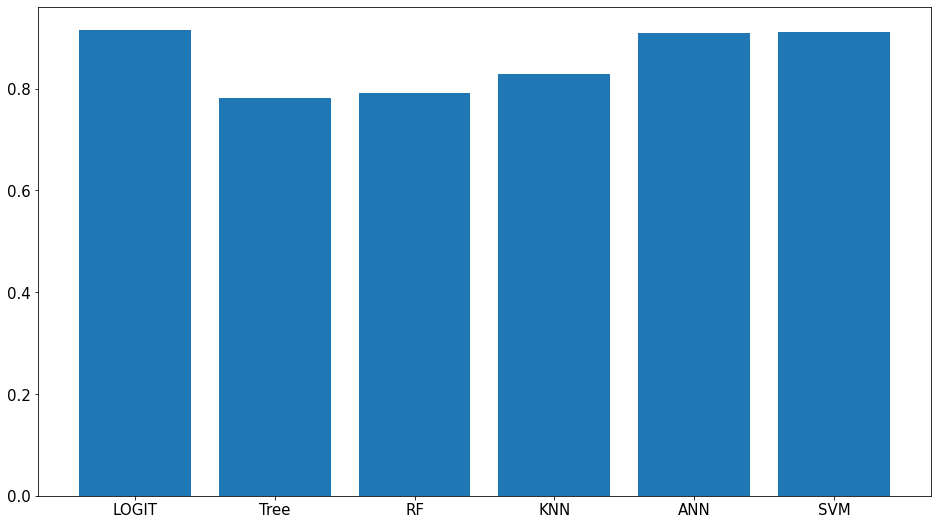

In [74]:
plt.rcParams["font.size"]=15
plt.bar(methods, scores_arr)
plt.show()

In [ ]:
# 두 번째 실습이 유의한 변수를 선택해서 진행했기 때문에 더 적절함